# Speech To Text and Sentiment Analysis using IBM watson API

In [117]:
#you will need the following library 
#!pip install ibm_watson wget

**First we import SpeechToTextV1 from ibm_watson.

In [2]:
from ibm_watson import SpeechToTextV1 
import json
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

***The service endpoint is based on the location of the service instance, we store the information in the variable URL. To find out which URL to use, view the service credentials.You require an API key, and you can obtain the key on the IBM cloud dashboard

In [8]:
url_s2t = " " ##url from IBM 

iam_apikey_s2t = "  " ##api key

In [11]:
authenticator = IAMAuthenticator(iam_apikey_s2t)
s2t = SpeechToTextV1(authenticator=authenticator)
s2t.set_service_url(url_s2t)
s2t

In [16]:
filename='test2.mp3' ##audio file path
with open(filename, mode="rb")  as wav:
    response = s2t.recognize(audio=wav, content_type='audio/mp3')

**The attribute result contains a dictionary that includes the translation:

In [33]:
response.result

{'results': [{'alternatives': [{'confidence': 0.93,
     'transcript': 'in this video we will cover polynomial regression and pipelines '}],
   'final': True},
  {'alternatives': [{'confidence': 0.9,
     'transcript': "what do we do when a linear model is not the best fit for our data let's look into another type of regression model the polynomial regression we transform our data into a polynomial then use linear regression to fit the parameters that we will discuss pipelines pipelines are way to simplify your code "}],
   'final': True},
  {'alternatives': [{'confidence': 0.95,
     'transcript': "polynomial regression is a special case of the general linear regression this method is beneficial for describing curvilinear relationships what is a curvilinear relationship it's what you get by squaring or setting higher order terms of the predictor variables in the model transforming the data the model can be quadratic which means the predictor variable in the model is squared we use a b

In [50]:
from pandas.io.json import json_normalize
import pandas as pd
data = pd.json_normalize(response.result['results'],"alternatives") 
data

,confidence,transcript
0,0.93,in this video we will cover polynomial regress...
1,0.90,what do we do when a linear model is not the b...
2,0.95,polynomial regression is a special case of the...
3,0.95,the model can be cubic which means the predict...
4,0.91,there also exists higher order polynomial regr...
5,0.89,let's look at an example from our data we gene...
6,0.92,in python we do this by using the poly fit fun...
7,0.90,negative one point five five seven X. one cute...
8,0.90,consider the feature shown here applying the m...
9,0.89,pipeline sequentially perform a series of tran...


In [56]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   confidence  11 non-null     float64
 1   transcript  11 non-null     object 
dtypes: float64(1), object(1)
memory usage: 304.0+ bytes


In [57]:
data.describe() 

,confidence
count,11.000000
mean,0.911818
std,0.022724
min,0.890000
25%,0.895000
50%,0.900000
75%,0.925000
max,0.950000


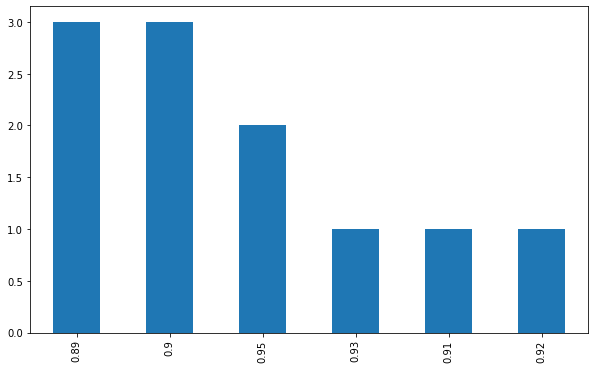

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
data['confidence'].value_counts().plot(kind='bar')

# textblob for Sentiment analysis

In [66]:
#!pip install textblob 
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud , STOPWORDS
from textblob import TextBlob

In [70]:
stop = stopwords.words('english')
data['transcript'] = data['transcript'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['transcript'][2]
#'inexpensive tablet use learn step nabi thrilled learn skype already'

'polynomial regression special case general linear regression method beneficial describing curvilinear relationships curvilinear relationship get squaring setting higher order terms predictor variables model transforming data model quadratic means predictor variable model squared use bracket indicated exponent second order polynomial regression figure representing function'

In [71]:
st = PorterStemmer()
data['transcript'] = data['transcript'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
data['transcript'][2]

'polynomi regress special case gener linear regress method benefici describ curvilinear relationship curvilinear relationship get squar set higher order term predictor variabl model transform data model quadrat mean predictor variabl model squar use bracket indic expon second order polynomi regress figur repres function'

In [85]:
def senti(x):
    return TextBlob(x).sentiment  

data['senti_score'] = data['transcript'].apply(senti)

data.senti_score

0                                     (0.0, 0.0)
1                      (0.6, 0.3666666666666667)
2      (0.0736607142857143, 0.43973214285714285)
3                               (0.0625, 0.5625)
4       (0.2735714285714285, 0.3235714285714285)
5                                     (0.0, 0.0)
6     (-0.13333333333333333, 0.4666666666666666)
7                                   (0.26, 0.36)
8     (0.12474747474747476, 0.41767676767676765)
9                   (0.125, 0.18333333333333332)
10                    (0.15, 0.6499999999999999)
Name: senti_score, dtype: object

In [106]:
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity

data['polarity'] = data.transcript.apply(detect_polarity)
data

,confidence,transcript,senti_score,polarity
0,0.93,video cover polynomi regress pipelin,"(0.0, 0.0)",0.000000
1,0.90,linear model best fit data let' look anoth typ...,"(0.6, 0.3666666666666667)",0.600000
2,0.95,polynomi regress special case gener linear reg...,"(0.0736607142857143, 0.43973214285714285)",0.073661
3,0.95,model cubic mean predictor variabl cute third ...,"(0.0625, 0.5625)",0.062500
4,0.91,also exist higher order polynomi regress good ...,"(0.2735714285714285, 0.3235714285714285)",0.273571
5,0.89,let' look exampl data gener polynomi regress m...,"(0.0, 0.0)",0.000000
6,0.92,python use poli fit function exampl develop th...,"(-0.13333333333333333, 0.4666666666666666)",-0.133333
7,0.90,neg one point five five seven X. one cute plu ...,"(0.26, 0.36)",0.260000
8,0.90,consid featur shown appli method transform dat...,"(0.12474747474747476, 0.41767676767676765)",0.124747
9,0.89,pipelin sequenti perform seri transform last s...,"(0.125, 0.18333333333333332)",0.125000


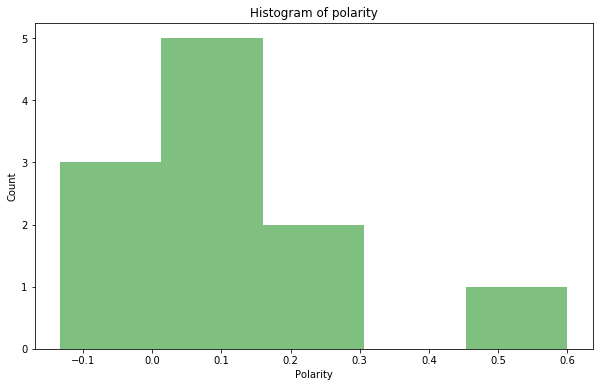

In [87]:
num_bins = 5
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(data.polarity, num_bins, facecolor='green', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

In [115]:
data[data.polarity >= -1].transcript

0                  video cover polynomi regress pipelin
1     linear model best fit data let' look anoth typ...
2     polynomi regress special case gener linear reg...
3     model cubic mean predictor variabl cute third ...
4     also exist higher order polynomi regress good ...
5     let' look exampl data gener polynomi regress m...
6     python use poli fit function exampl develop th...
7     neg one point five five seven X. one cute plu ...
8     consid featur shown appli method transform dat...
9     pipelin sequenti perform seri transform last s...
10    method normal data perform polynomi transform ...
Name: transcript, dtype: object

In [113]:
data[data.polarity == 1].transcript.head()

Series([], Name: transcript, dtype: object)

In [123]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in data.transcript: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  

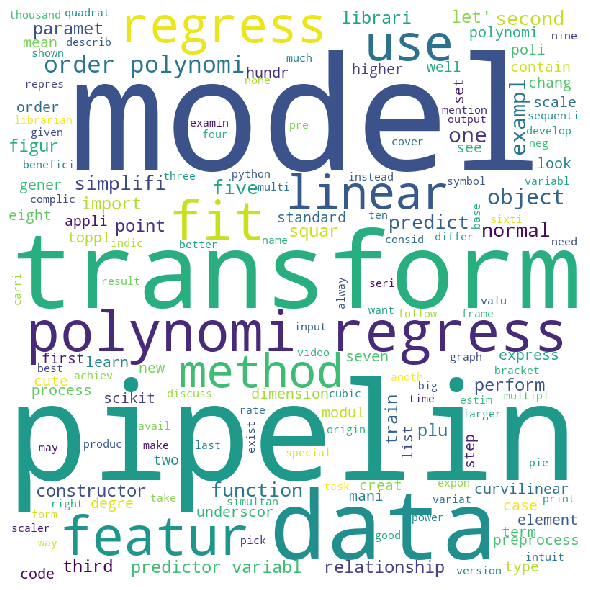

In [124]:
plt.figure(figsize = (8, 8), facecolor = None , alig) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()